<font color=red><p style="font-size:32px;text-align:center"><b>Diabetes Prediction</b></p></font>

<h3>Overview</h3>
- Predict that whether the patient has diabetes or not on the basis of the features.

- Source: <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle - Pima Indians Diabetes Database</a>

<h3>Context</h3>
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

<h3>Problem Statement</h3>
- Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not ?

<h3>Features/Columns</h3>
- **Pregnancies :** Number of times pregnant
- **Glucose :** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure :** Diastolic blood pressure (mm Hg)
- **SkinThickness :** Triceps skin fold thickness (mm)
- **Insulin :** 2-Hour serum insulin (mu U/ml)
- **BMI :** Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction :** Diabetes pedigree function
- **Age :** Age (years)
- **Outcome :** Class variable (0 or 1) 268 of 768 are 1, the others are 0

<h3><font color=blue>Loading and Reading Data</font></h3>

In [1]:
import pandas as pd
diabetes_data = pd.read_csv("diabetes.csv")

print("NUMBER OF DATAPOINTS -",diabetes_data.shape[0])
print("NUMBER OF FEATURES -",diabetes_data.shape[1])
print("FEATURES -",diabetes_data.columns)

NUMBER OF DATAPOINTS - 768
NUMBER OF FEATURES - 9
FEATURES - Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h4>Database Information</h4>

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h4>Check Null Values</h4>

In [5]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from the above code we first checked that is there any null values from the **isna()** function, then we are going to take the sum of all those missing values from the **sum()** function and the inference we now get is that there are no missing values but that is actually not a true, as in **this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value** then start the imputation process.

In [6]:
import numpy as np
new_diabetes_data = diabetes_data.copy(deep=True)

new_diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = new_diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
new_diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As mentioned above that now we will be **replacing the zeros with the NAN values** so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e **to apply mean values of each column to the null values of the respective columns.**

<h3><font color=blue>Data Visualization</font></h3>

<h4>Plotting The Data Distribution Plots Before Removing Null Values</h4>

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

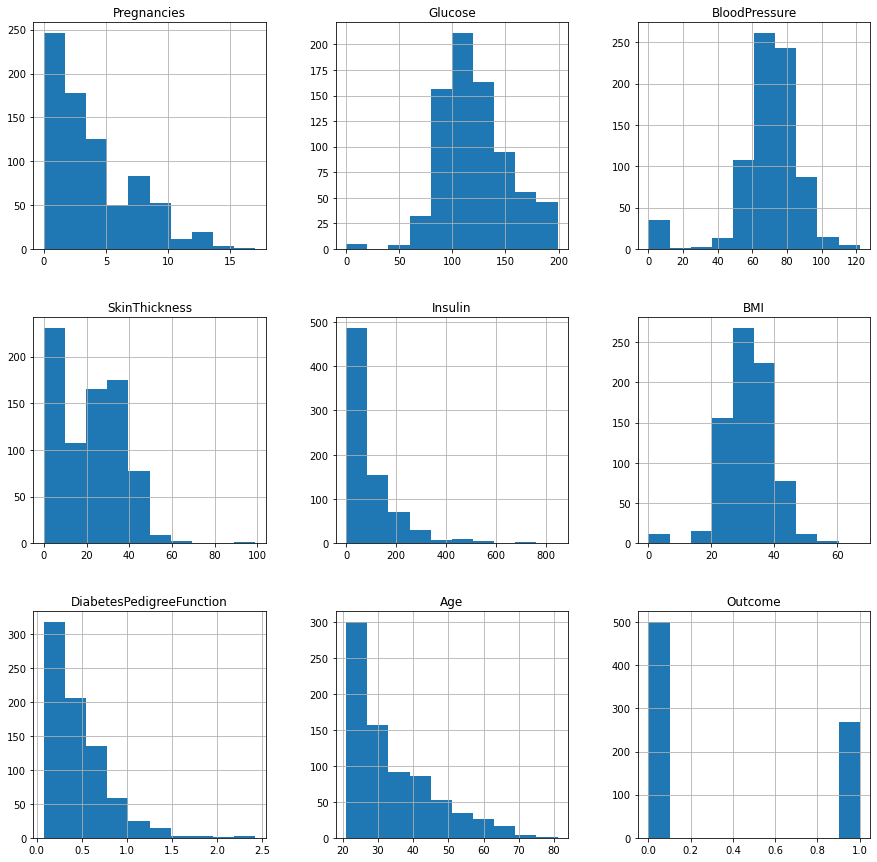

In [8]:
diabetes_data.hist(figsize=(15,15))

**Inference:** So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that **why do we need to see the distribution of data ?** So the answer is simple it is the best way to start the analysis of the dataset as **it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.**

**Now we will be imputing the mean value of the column to each missing value of that particular column.**

In [9]:
new_diabetes_data['Glucose'].fillna(new_diabetes_data['Glucose'].median(), inplace=True)
new_diabetes_data['SkinThickness'].fillna(new_diabetes_data['SkinThickness'].median(), inplace=True)
new_diabetes_data['BloodPressure'].fillna(new_diabetes_data['BloodPressure'].median(), inplace=True)
new_diabetes_data['Insulin'].fillna(new_diabetes_data['Insulin'].median(), inplace=True)
new_diabetes_data['BMI'].fillna(new_diabetes_data['BMI'].median(), inplace=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

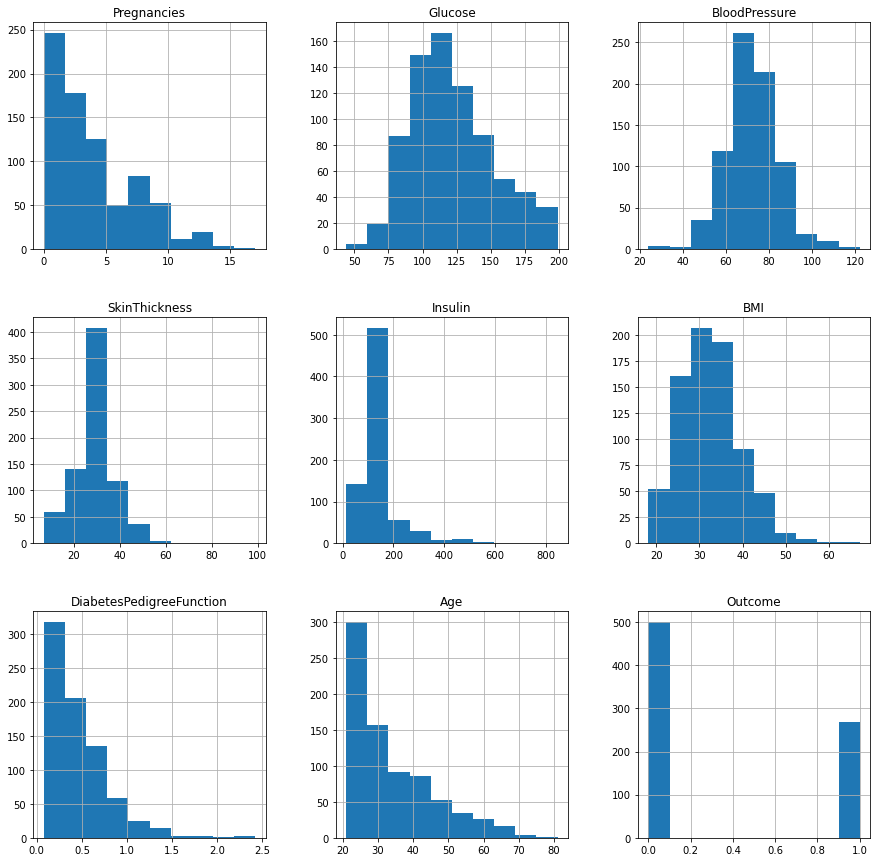

In [10]:
new_diabetes_data.hist(figsize=(15,15))

**Plotting Null Count Analysis Plot**

<AxesSubplot:>

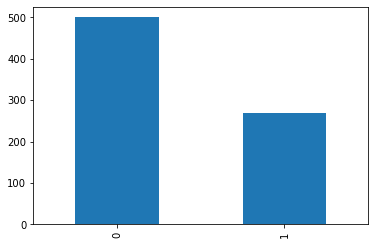

In [11]:
value_counts = diabetes_data['Outcome'].value_counts()

value_counts.plot.bar()

Here from the above visualization it is clearly visible that our **dataset is completely imbalanced** in fact the number of patients who are **diabetic is half of the patients who are non-diabetic.**

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\Prateek Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

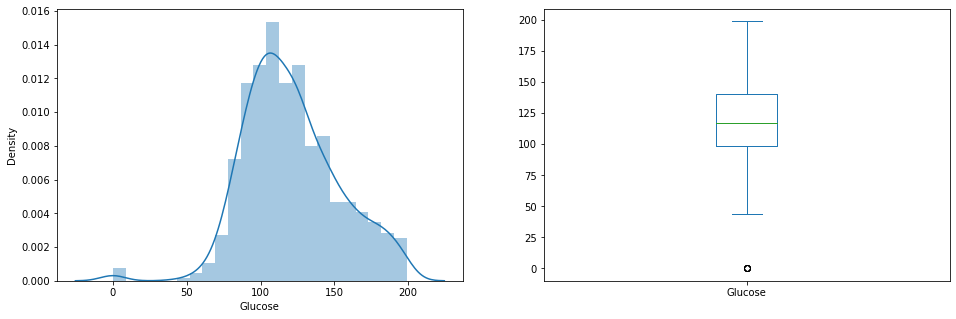

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(121)
sns.distplot(diabetes_data['Glucose'])

plt.subplot(122)
diabetes_data['Glucose'].plot.box(figsize=(16,5))

That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

<h4>Correlation Between All The Features</h4>

<AxesSubplot:>

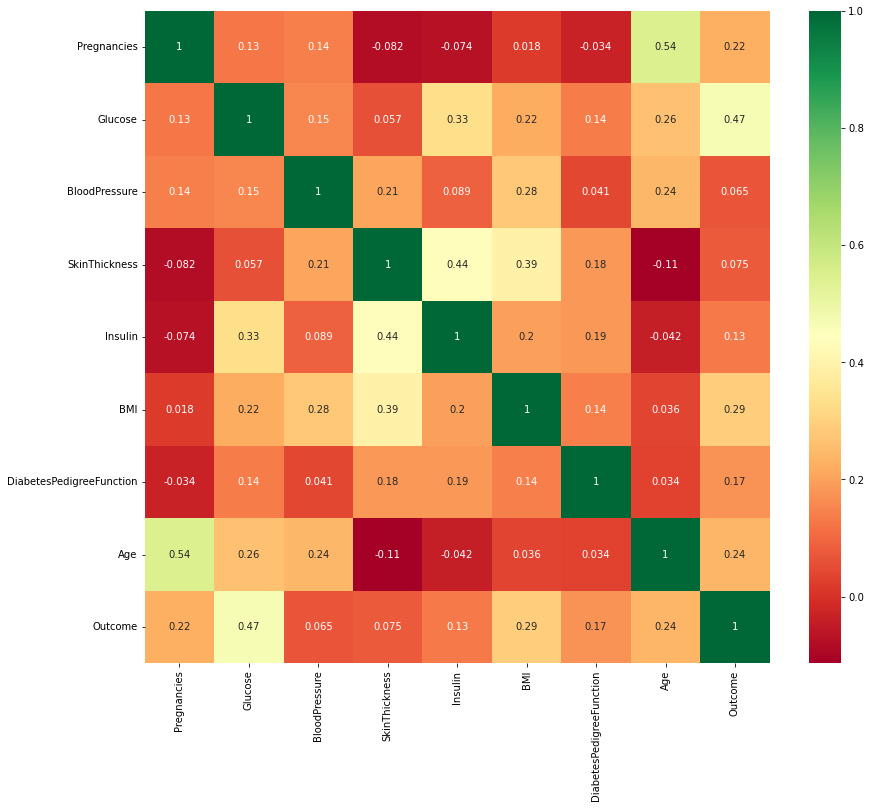

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(diabetes_data.corr(),annot=True, cmap ='RdYlGn')

<h4>Scaling The Data (Normalizing)</h4>

In [14]:
new_diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(new_diabetes_data.drop(["Outcome"],axis=1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our **ML model to give a better result.**

<h3><font color=blue>Model Building</font></h3>

In [16]:
#now we will split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split
X = new_diabetes_data.drop(['Outcome'], axis=1)
Y = new_diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


<h3><font color=red>1. Random Forest</font></h3>

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
params = {'n_estimators':[10,50,100,500,1000,2000,3000]}

rf_clf = GridSearchCV(rf, params, scoring='roc_auc', n_jobs=-1, return_train_score=True)
rf_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 500, 1000, 2000, 3000]},
             return_train_score=True, scoring='roc_auc')

In [18]:
print("Best n_estimators :",rf_clf.best_params_['n_estimators'])
print("Best Score: ",rf_clf.best_score_)

Best n_estimators : 1000
Best Score:  0.8247078214799733


In [19]:
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [22]:
from sklearn import metrics
rfc_train = rf_clf.predict(X_train)
print("Train Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

predictions = rf_clf.predict(X_test)
print("Test Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Train Accuracy_Score = 1.0
Test Accuracy_Score = 0.8246753246753247


In [23]:
from sklearn.metrics import classification_report
pred_test = rf_clf.predict(X_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



<AxesSubplot:>

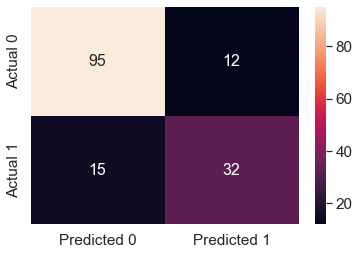

In [24]:
from sklearn.metrics import confusion_matrix
con_mat1 = pd.DataFrame(confusion_matrix(y_test, pred_test))
con_mat1.columns = ['Predicted 0','Predicted 1']
con_mat1 = con_mat1.rename({0: 'Actual 0', 1: 'Actual 1'})

sns.set(font_scale=1.4)
sns.heatmap(con_mat1, annot=True,annot_kws={"size": 16}, fmt='g')

<h3><font color=red>2. XGBoost Classifier</font></h3>

In [25]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

random_clf = RandomizedSearchCV(xgb_clf, param_distributions=prams, verbose=10, n_jobs=-1)

random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [26]:
print("Best learning_rate :",random_clf.best_params_['learning_rate'])
print("Best n_estimators :",random_clf.best_params_['n_estimators'])
print("Best max_depth :",random_clf.best_params_['max_depth'])
print("Best colsample_bytree :",random_clf.best_params_['colsample_bytree'])
print("Best subsample :",random_clf.best_params_['subsample'])
print("Best Score: ",random_clf.best_score_)

Best learning_rate : 0.01
Best n_estimators : 100
Best max_depth : 5
Best colsample_bytree : 0.5
Best subsample : 0.3
Best Score:  0.7606024256963881


In [27]:
xgb_clf = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=10, colsample_bytree=0.5, subsample=0.1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
xgb_train = xgb_clf.predict(X_train)
print("Train Accuracy_Score =", format(metrics.accuracy_score(y_train, xgb_train)))

pred = xgb_clf.predict(X_test)
print("Test Accuracy_Score =", format(metrics.accuracy_score(y_test, pred)))

Train Accuracy_Score = 0.7817589576547231
Test Accuracy_Score = 0.8116883116883117


In [29]:
pred_test = xgb_clf.predict(X_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.55      0.64        47

    accuracy                           0.81       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.81      0.81      0.80       154



<AxesSubplot:>

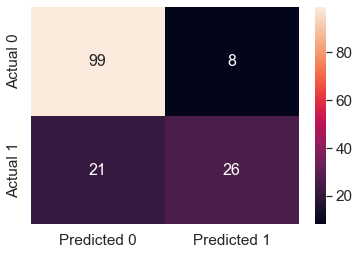

In [30]:
con_mat2 = pd.DataFrame(confusion_matrix(y_test, pred_test))
con_mat2.columns = ['Predicted 0','Predicted 1']
con_mat2 = con_mat2.rename({0: 'Actual 0', 1: 'Actual 1'})

sns.set(font_scale=1.4)
sns.heatmap(con_mat2, annot=True,annot_kws={"size": 16}, fmt='g')

<h3><font color=red>3. Support Vector Machine (SVM)</font></h3>

In [31]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [32]:
svc_train = svc_model.predict(X_train)
print("Train Accuracy_Score =", format(metrics.accuracy_score(y_train, svc_train)))

pred = svc_model.predict(X_test)
print("Test Accuracy_Score =", format(metrics.accuracy_score(y_test, pred)))

Train Accuracy_Score = 0.758957654723127
Test Accuracy_Score = 0.7922077922077922


In [33]:
pred_test = svc_model.predict(X_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



<AxesSubplot:>

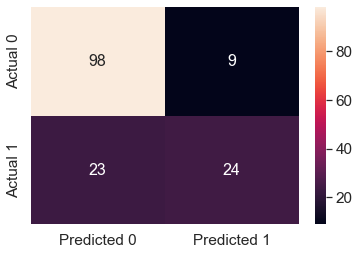

In [34]:
con_mat3 = pd.DataFrame(confusion_matrix(y_test, pred_test))
con_mat3.columns = ['Predicted 0','Predicted 1']
con_mat3 = con_mat3.rename({0: 'Actual 0', 1: 'Actual 1'})

sns.set(font_scale=1.4)
sns.heatmap(con_mat3, annot=True,annot_kws={"size": 16}, fmt='g')

<h3><font color=blue>Conclusion From Model Building</font></h3>

Therefore **Random Forest** is the best model for this prediction since it has an accuracy score of **0.81.**

<h3><font color=blue>Feature Importance</font></h3>

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [35]:
#getting feature importances
rf_clf.feature_importances_

array([0.07790106, 0.24326675, 0.08487901, 0.07611793, 0.08617934,
       0.16172005, 0.12934821, 0.14058764])

From the above output, it is not much clear that which feature is important for that reason **we will now make a visualization of the same.**

<AxesSubplot:>

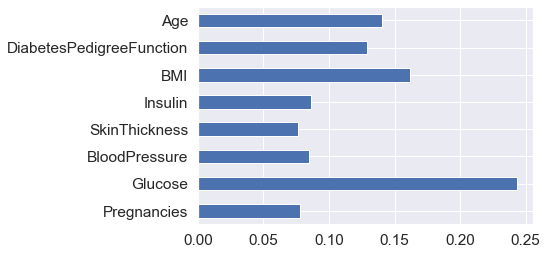

In [36]:
pd.Series(rf_clf.feature_importances_, index=X.columns).plot(kind='barh')

Here from the above graph, it is clearly visible that **Glucose as a feature is the most important in this dataset.**

<h3><font color=blue>Saving Model – Random Forest</font></h3>

In [37]:
import pickle

#firstly we will be using the dump() function to save the model using pickle
save_model = pickle.dumps(rf_clf)

#then we will be loading that saved model
rf_from_pickle = pickle.loads(save_model)

#lastly, after loading that model we will use this to make predictions
rf_from_pickle.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Now for the last time, I’ll be looking at the head and tail of the dataset so that we can take any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [38]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<font color=red>Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.</font>

In [40]:
rf_clf.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [41]:
rf_clf.predict([[10,101,76,48,180,32.9,0.171,63]]) #763th patient

array([0], dtype=int64)

<h3><font color=red>Conclusion</font></h3>

After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.